In [2]:
import scipy as sp
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [3]:
data = sp.io.loadmat('Yeast_DIP.mat')
YSTnet = data['YSTnet']

Let's process the network, which is not symmetrized with loops

In [4]:
Ndir = np.sum(YSTnet - YSTnet.T)
Nloop = YSTnet.trace()

print(Ndir)
print(Nloop)

YSTnet.setdiag(0)
YSTnetSYM = YSTnet + YSTnet.T

GraphYST = nx.from_scipy_sparse_array(YSTnetSYM)

0.0
4713.0


In [5]:
Kyst = nx.degree_centrality(GraphYST)
Kyst = np.array(list(Kyst.values()))
Knn = np.divide(YSTnetSYM * Kyst, Kyst)

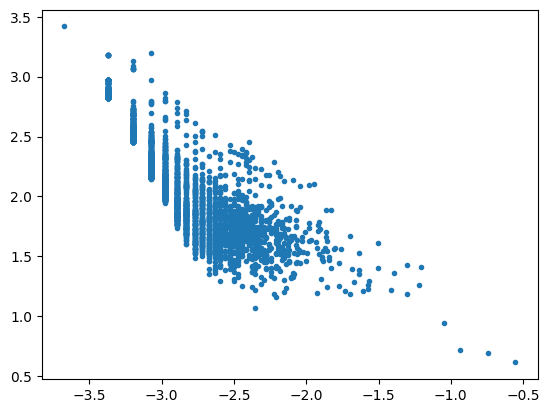

In [6]:
plt.plot(np.log10(Kyst), np.log10(Knn), '.')